# MaNGA Data from Marvin

This shows how to use the [marvin](https://sdss-marvin.readthedocs.io/en/latest/index.html) package to read MaNGA data cubes and other files.

After installing marvin it's useful to set up the user environment to choose a default data release and set a location for downloads if you want to store data locally (recommended).

1. Set the environment variable `SAS_BASE_DIR`, e.g., `export SAS_BASE_DIR=/Users/username/Documents/MaNGA/sas`.
2. [Set the default release](https://sdss-marvin.readthedocs.io/en/stable/core/config.html) in the config file `~/.marvin/marvin.yml`.

In [1]:
import marvin

import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.coordinates import SkyCoord
from photutils import SkyEllipticalAperture

/Users/sybenzvi/anaconda3/envs/marvin/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/sybenzvi/anaconda3/envs/marvin/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/sybenzvi/anaconda3/envs/marvin/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


## Access a Data Cube

Get data using the plate and IFU design ID you want. If the data are available on a local disk in `SAS_BASE_DIR` marvin will default to using them. Otherwise it will download the data automatically from the SDSS public server. You can explicitly download the data so that it will be available locally for future calls.

In [2]:
# Load a data cube. If it is on disk you will see mode='local'; else mode='remote'.
cube = marvin.tools.Cube('7443-12705')
if cube.mode == 'remote':
    cube.download()

/Users/sybenzvi/anaconda3/envs/marvin/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Look at the Data Cube Header

In [3]:
cube.header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                   74 /                                                
NAXIS2  =                   74 /                                                
NAXIS3  =                 4563 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
AUTHOR  = 'Brian Cherinka & David Law <bcherin1@jhu.edu, dlaw@stsci.edu>' /     
VERSDRP2= 'v2_4_3  '           / MaNGA DRP version (2d processing)              
VERSDRP3= 'v2_4_3  '           / MaNGA DRP Version (3d processing)              
VERSPLDS= 'v2_52   '           / Platedesign Version                            
VERSFLAT= 'v1_31   '        

### Look at the Cube WCS

In [4]:
cube.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVE-LOG'  
CRVAL : 230.15302  41.960436  3.62159598486e-07  
CRPIX : 38.0  38.0  1.0  
CD1_1 CD1_2 CD1_3  : -0.000138889  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  0.000138889  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  8.33903304339e-11  
NAXIS : 74  74  4563

### Access the NASA-Sloan Atlas Data for this Cube

In [5]:
cube.nsa

/Users/sybenzvi/anaconda3/envs/marvin/lib/python3.7/site-packages/marvin/utils/general/general.py:1086: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  value = np.asscalar(value)


{'iauname': 'J152036.72+415737.5',
 'field': 219,
 'run': 3918,
 'camcol': 2,
 'version': 'v1_0_1',
 'nsaid': 340990,
 'nsaid_v1b': 102206,
 'z': 0.0644735,
 'zdist': 0.0648265,
 'sersic_absmag': [-17.0382,
  -17.8185,
  -19.0217,
  -20.2352,
  -20.9003,
  -21.2411,
  -21.4284],
 'elpetro_absmag': [-17.6063,
  -18.3004,
  -19.0394,
  -20.2639,
  -20.8376,
  -21.008,
  -21.3056],
 'elpetro_amivar': [47.6298,
  403.579,
  171.949,
  1953.57,
  1887.16,
  2331.25,
  307.521],
 'sersic_mass': 22591800000.0,
 'elpetro_mass': 17922100000.0,
 'elpetro_ba': 0.481529,
 'elpetro_phi': 36.9388,
 'extinction': [0.158072,
  0.155975,
  0.0982947,
  0.0723243,
  0.0524556,
  0.0397755,
  0.0282013],
 'elpetro_th50_r': 7.37167,
 'petro_th50': 5.64755,
 'petro_flux': [17.2395, 28.9161, 98.5176, 275.032, 470.763, 653.709, 746.484],
 'petro_flux_ivar': [0.0821177,
  0.659728,
  0.0491897,
  0.169709,
  0.0167582,
  0.0762356,
  0.000810977],
 'elpetro_flux': [24.3463,
  44.2687,
  75.8922,
  268.716,
  

## Access Maps

Access maps according to their `bintype`. The default is `HYB10` but we'll specify it anyway just to see how it looks.

As with the cube itself, the map will be accessed remotely unless you explicitly download it.

In [6]:
hybmap = cube.getMaps(bintype='HYB10')
if hybmap.mode == 'remote':
    # Download the map to SAS_BASE_DIR as follows:
    hybmap.download()

In [7]:
hybmap.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 230.15302  41.960436  
CRPIX : 38.0  38.0  
PC1_1 PC1_2  : -0.000138889  0.0  
PC2_1 PC2_2  : 0.0  0.000138889  
CDELT : 1.0  1.0  
NAXIS : 74  74

### Access the DAPALL Primary Catalog

The dapall file is the FITS summary table for the MaNGA Data Analysis Pipeline (DAP). It can be accessed via the `dapall` attribute of Map objects in marvin.

Note that the dapall FITS file needs to be downloaded locally to the appropriate location in `SAS_BASE_DIR` for the attribute to successfully find it. In my case I found it was downloaded to a `redux` subdirectory, but for the `dapall` attribute to work it needs to be in the `analysis` subdirectory.

Information about the dapall file is provided [here](https://www.sdss.org/dr16/manga/manga-data/catalogs/#DAPALLFile).

Documentation about the quantities within are available on [this SDSS webpage](https://data.sdss.org/datamodel/files/MANGA_SPECTRO_ANALYSIS/DRPVER/DAPVER/dapall.html).

In [8]:
hybmap.dapall

/Users/sybenzvi/anaconda3/envs/marvin/lib/python3.7/site-packages/marvin/tools/mixins/dapall.py:53: ResourceWarning: unclosed file <_io.FileIO name='/Users/sybenzvi/Documents/MaNGA/sas/dr16/manga/spectro/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits' mode='rb' closefd=True>
  dapall_data = self._get_dapall_from_file()


{'plate': 7443,
 'ifudesign': 12705,
 'plateifu': '7443-12705',
 'mangaid': '12-84627',
 'drpallindx': 3287,
 'mode': 'CUBE',
 'daptype': 'HYB10-GAU-MILESHC',
 'dapdone': True,
 'objra': 230.15302,
 'objdec': 41.960438,
 'ifura': 230.15302,
 'ifudec': 41.960438,
 'mngtarg1': 4,
 'mngtarg2': 0,
 'mngtarg3': 0,
 'z': 0.0644735,
 'ldist_z': 202.72534,
 'adist_z': 178.91153,
 'nsa_z': 0.0644735,
 'nsa_zdist': 0.0648265,
 'ldist_nsa_z': 202.72534,
 'adist_nsa_z': 178.91153,
 'nsa_elpetro_ba': 0.481529,
 'nsa_elpetro_phi': 36.9388,
 'nsa_elpetro_th50_r': 7.37167,
 'nsa_sersic_ba': 0.361803,
 'nsa_sersic_phi': 36.7946,
 'nsa_sersic_th50': 8.42868,
 'nsa_sersic_n': 0.985387,
 'versdrp2': 'v2_4_3',
 'versdrp3': 'v2_4_3',
 'verscore': 'v1_6_2',
 'versutil': 'v5_5_32',
 'versdap': '2.2.1',
 'drp3qual': 0,
 'dapqual': 0,
 'rdxqakey': 'SNRG',
 'binkey': 'HYB10',
 'sckey': 'GAU-MILESHC',
 'elmkey': 'EMOMM',
 'elfkey': 'EFITMDB',
 'sikey': 'INDXEN',
 'bintype': 'voronoi',
 'binsnr': 10.0,
 'tplkey': 

In [9]:
# Object position and distance using NSA Sloan Atlas.
objra, objdec = [hybmap.dapall[_] for _ in ['objra', 'objdec']]
z = hybmap.dapall['nsa_z']
D_L = hybmap.dapall['ldist_nsa_z']
D_A = hybmap.dapall['adist_nsa_z']

# Petrosian isophotal ellipse axis ratio, angle (E of N), and 50% light radius in r band.
ba_p = hybmap.dapall['nsa_elpetro_ba']
phi_p = hybmap.dapall['nsa_elpetro_phi']
th50_p = hybmap.dapall['nsa_elpetro_th50_r']

# Sersic isophotal ellipse axis ratio, angle (E of N), 50% light radius, and index.
ba_s = hybmap.dapall['nsa_sersic_ba']
phi_s = hybmap.dapall['nsa_sersic_phi']
th50_s = hybmap.dapall['nsa_sersic_th50']
n_s = hybmap.dapall['nsa_sersic_n']

# Ellipse radius covering 90% of elliptical annuli.
rcov90 = hybmap.dapall['rcov90']

### Access H-alpha Map

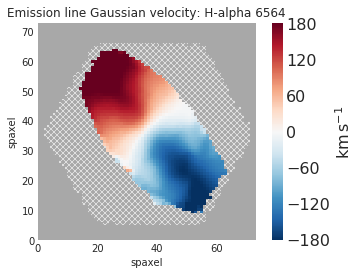

In [10]:
vHa = hybmap.getMap('EMLINE_GVEL', channel='HA_6564')
fig, ax = vHa.plot()

### Access H-alpha Map Attributes

Useful map quantities can be accessed as attributes of the Map object, e.g.,
- The map mask: `vHa.mask`
- The map inverse variance: `vHa.ivar`
- The map values: `vHa.value`

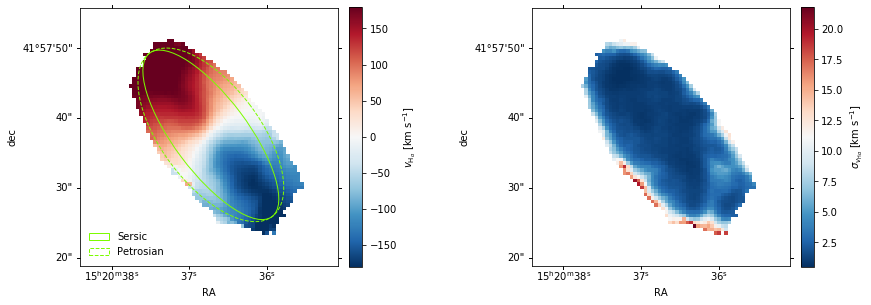

In [11]:
velHa = np.ma.masked_array(vHa.value, vHa.mask)
velHa_ivar = np.ma.masked_array(vHa.ivar, vHa.mask)
dvelHa = 1. / np.sqrt(velHa_ivar)

fig, axes = plt.subplots(1,2, figsize=(12,4.5),
                         sharex=True, sharey=True,
                         subplot_kw={'projection':hybmap.wcs},
                         gridspec_kw={'wspace':0.6})
ax = axes[0]
im = ax.imshow(velHa, origin='lower', cmap='RdBu_r', vmin=-180, vmax=180)
cb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cb.set_label(r'$v_{\mathrm{H}_\alpha}$ [km s$^{-1}$]')
ax.set(aspect='equal',
       xlabel=r'RA',
       ylabel=r'dec')

# Plot the Sersic isophotal 90% coverage ellipse.
aper = SkyEllipticalAperture(SkyCoord(objra*u.degree, objdec*u.degree, frame='icrs'),
                             rcov90*u.arcsec, rcov90*ba_s*u.arcsec,
                             (phi_s)*u.degree)
pix = aper.to_pixel(hybmap.wcs)
pix.plot(axes=ax, color='lawngreen', label='Sersic')

# Plot the Petrosian isophotal 90% coverage ellipse.
aper = SkyEllipticalAperture(SkyCoord(objra*u.degree, objdec*u.degree, frame='icrs'),
                             rcov90*u.arcsec, rcov90*ba_p*u.arcsec,
                             (phi_p)*u.degree)
pix = aper.to_pixel(hybmap.wcs)
pix.plot(axes=ax, ls='--', color='lawngreen', label='Petrosian')

leg = ax.legend()
leg.get_frame().set_linewidth(0)

ax = axes[1]
im = ax.imshow(dvelHa, origin='lower', cmap='RdBu_r')
cb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cb.set_label(r'$\sigma_{v_{\mathrm{H}\alpha}}$ [km s$^{-1}$]')
ax.set(aspect='equal',
       xlabel=r'RA',
       ylabel=r'dec')

fig.subplots_adjust(left=0.125, bottom=0.125, right=0.975, top=0.95)

## Elliptical Galaxy

Example of an elliptical galaxy with a fairly random velocity field along the line of sight.

In [12]:
cube = marvin.tools.Cube('7443-1902')
if cube.mode == 'remote':
    cube.download()

In [13]:
hybmap = cube.getMaps(bintype='HYB10')
if hybmap.mode == 'remote':
    hybmap.download()

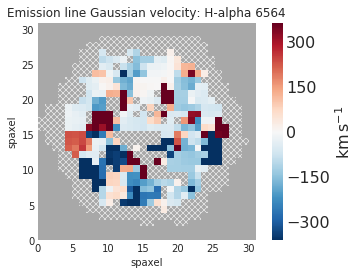

In [14]:
vHa = hybmap.getMap('EMLINE_GVEL', channel='HA_6564')
fig, ax = vHa.plot()